In [16]:
import numpy as np
import pickle
import sympy

from complex_spacetime_metrics import metric as metric_utils
from complex_spacetime_metrics.admissibility import AnalyticalRootsAngular

In [2]:
data_dir_path = "../../data"

Build metric.

In [3]:
metric = metric_utils.Metric3D()

In [4]:
metric_coeffs = metric.coefficients()

In [5]:
metric_coeffs[metric_utils.A]

(\tilde{r} - \tilde{r}_+)*(\tilde{r}**3*\tilde{r}_+**4 + 2*\tilde{r}**3*\tilde{r}_+**2*a**2*cos(theta)**2 + \tilde{r}**3*a**4*cos(theta)**2 + \tilde{r}**3*a**2*cos(theta)**2 - \tilde{r}**3*a**2 + \tilde{r}**2*\tilde{r}_+**5 + 2*\tilde{r}**2*\tilde{r}_+**3*a**2*cos(theta)**2 + \tilde{r}**2*\tilde{r}_+*a**4*cos(theta)**2 + \tilde{r}**2*\tilde{r}_+*a**2*cos(theta)**2 - \tilde{r}**2*\tilde{r}_+*a**2 + \tilde{r}*\tilde{r}_+**6 + 2*\tilde{r}*\tilde{r}_+**4*a**2*cos(theta)**2 + \tilde{r}*\tilde{r}_+**4*a**2 + \tilde{r}*\tilde{r}_+**4 + 2*\tilde{r}*\tilde{r}_+**2*a**4*cos(theta)**4 + \tilde{r}*\tilde{r}_+**2*a**4*cos(theta)**2 + \tilde{r}*\tilde{r}_+**2*a**2*cos(theta)**2 + \tilde{r}*\tilde{r}_+**2*a**2 + \tilde{r}*a**6*cos(theta)**4 + \tilde{r}*a**4*cos(theta)**4 + \tilde{r}_+**7 + 2*\tilde{r}_+**5*a**2*cos(theta)**2 - \tilde{r}_+**5*a**2 - 4*\tilde{r}_+**5*a - \tilde{r}_+**5 + 2*\tilde{r}_+**3*a**4*cos(theta)**4 - 3*\tilde{r}_+**3*a**4*cos(theta)**2 - 8*\tilde{r}_+**3*a**3*cos(theta)**2 - 3*

In [6]:
A = sympy.fraction(metric_coeffs[metric_utils.A])[0]
A

(\tilde{r} - \tilde{r}_+)*(\tilde{r}**3*\tilde{r}_+**4 + 2*\tilde{r}**3*\tilde{r}_+**2*a**2*cos(theta)**2 + \tilde{r}**3*a**4*cos(theta)**2 + \tilde{r}**3*a**2*cos(theta)**2 - \tilde{r}**3*a**2 + \tilde{r}**2*\tilde{r}_+**5 + 2*\tilde{r}**2*\tilde{r}_+**3*a**2*cos(theta)**2 + \tilde{r}**2*\tilde{r}_+*a**4*cos(theta)**2 + \tilde{r}**2*\tilde{r}_+*a**2*cos(theta)**2 - \tilde{r}**2*\tilde{r}_+*a**2 + \tilde{r}*\tilde{r}_+**6 + 2*\tilde{r}*\tilde{r}_+**4*a**2*cos(theta)**2 + \tilde{r}*\tilde{r}_+**4*a**2 + \tilde{r}*\tilde{r}_+**4 + 2*\tilde{r}*\tilde{r}_+**2*a**4*cos(theta)**4 + \tilde{r}*\tilde{r}_+**2*a**4*cos(theta)**2 + \tilde{r}*\tilde{r}_+**2*a**2*cos(theta)**2 + \tilde{r}*\tilde{r}_+**2*a**2 + \tilde{r}*a**6*cos(theta)**4 + \tilde{r}*a**4*cos(theta)**4 + \tilde{r}_+**7 + 2*\tilde{r}_+**5*a**2*cos(theta)**2 - \tilde{r}_+**5*a**2 - 4*\tilde{r}_+**5*a - \tilde{r}_+**5 + 2*\tilde{r}_+**3*a**4*cos(theta)**4 - 3*\tilde{r}_+**3*a**4*cos(theta)**2 - 8*\tilde{r}_+**3*a**3*cos(theta)**2 - 3*

In [7]:
roots = sympy.solve(A, metric_utils.r_tilde)

In [9]:
A_coeffs = sympy.Poly(A, metric_utils.r_tilde).all_coeffs()
leading_coeff = A_coeffs[0].simplify().factor()
leading_coeff

\tilde{r}_+**4 + 2*\tilde{r}_+**2*a**2*cos(theta)**2 + a**4*cos(theta)**2 + a**2*cos(theta)**2 - a**2

Create grid.

In [10]:
a_vals = np.arange(0, 1.005, 0.005)
r_tilde_plus_vals = np.arange(-1, 1.01, 0.01)
a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

Evaluate admissibility.

In [11]:
admissible_evaluator = AnalyticalRootsAngular()
admissible_maps = {}

In [12]:
theta_val = np.pi / 4
filename = f"{data_dir_path}/q_1.A_gt_0.theta_pi_4.pk"
admissible_maps[theta_val] = admissible_evaluator.admissibility(
    a_vals_grid, r_tilde_plus_vals_grid, theta_val, roots, leading_coeff, filename
)

100%|██████████| 40401/40401 [02:23<00:00, 281.19it/s] 


Text(0.5, 1.0, '$\\theta = \\pi/4$')

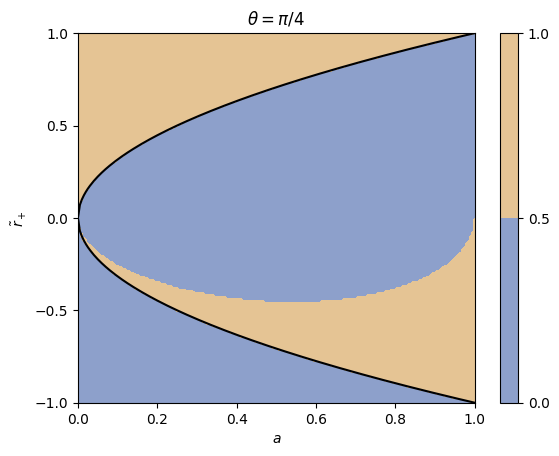

In [14]:
import matplotlib.pyplot as plt
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, admissible_maps[theta_val], cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/4$')

In [17]:
with open(filename, "rb") as input_file:
    X = pickle.load(input_file)